**作业命名方式：**

1. 作业请命名为 机器学习第几周作业；
2. 请在开头注明姓名、学号及日期。

**作业结构：**

1. 问题描述；
2. 数据的处理和展示；
3. 问题解答，如有多个问题，请分点解答；
4. 结论和讨论，对题目进行总结回答，并进行适当的讨论。

**注意事项：**
1. 代码中重要部分需要有注释；
2. 如涉及计算或证明题，请使用markdown格式书写，公式书写注意规范；
3. 如需绘制统计图表，统计图表表达的信息应清晰，请标明坐标轴含义及图表标题，并附上适当的文字说明。

**示例**

**1. 问题描述**

Boston房价数据中有两个变量：dis(the weighted mean of distances to five Boston employment ccntcrs)和nox(nitrogenoxides)。

做这两个变量的散点图，观察两者之间的关系，选择多项式的阶数（1，5）用nox对distance 做回归，通过训练数据MSE比较不同阶数的拟合优度，输出各阶的估计系数，结合岭回归选择合适的阶数。

**2. 数据处理**

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.linear_model import LinearRegression,Perceptron
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

In [2]:
# 载入波士顿房价数据集，提取需要的变量nox和dis
Boston = datasets.load_boston()
data = Boston.data
dis=data[:,7]
nox=data[:,4]
# 将 x，y 分别增加一个轴，以满足 sklearn 中回归模型认可的数据
nox = nox[:, np.newaxis]
dis = dis[:, np.newaxis]

**3. dis-nox散点图**

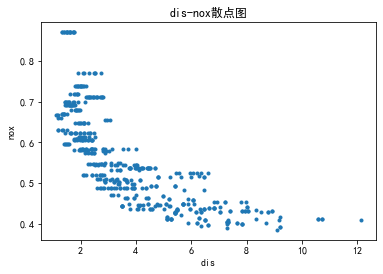

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(dis,nox,marker='.') 
plt.xlabel("dis")
plt.ylabel("nox")
plt.title("dis-nox散点图")
plt.show() 

从散点图可以看出dis和nox之间存在负相关关系，并且用简单的一元线性回归模型来描述这种相关关系并不准确。

**3. 多项式回归**

输出1-5阶多项式回归训练数据的系数和拟合优度。

In [4]:
# 数据集划分
x_train, x_test, y_train, y_test = train_test_split(dis, nox, test_size=0.3,random_state=1)
mse = []
degrees = np.arange(1, 6)

In [5]:
for deg in degrees:
    # 生成多项式特征集(如根据degree=3 ,生成 [[x,x**2,x**3]] )
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)
    
    # 多项式拟合
    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)
    #print(poly_reg.coef_,poly_reg.intercept_) #系数及常数
    
    y_train_pred = poly_reg.predict(x_train_poly)
    
    poly_mse = mean_squared_error(y_train, y_train_pred)
    mse.append(poly_mse)
    
    r2score = r2_score(y_train, y_train_pred)
    
    print('degree = %s' % (deg))
    print("coef：",poly_reg.coef_[0],poly_reg.intercept_)
    print(' MSE = %.6f ,r2_score = %.2f' % ( poly_mse,r2score))
    print("--------------------------------------")

degree = 1
coef： [-0.04249953] [0.71795583]
 MSE = 0.005663 ,r2_score = 0.59
--------------------------------------
degree = 2
coef： [-0.11159661  0.00705086] [0.84701328]
 MSE = 0.004185 ,r2_score = 0.70
--------------------------------------
degree = 3
coef： [-0.17193597  0.01969892 -0.00075492] [0.92424815]
 MSE = 0.004023 ,r2_score = 0.71
--------------------------------------
degree = 4
coef： [-1.66862998e-01  1.80546213e-02 -5.50399489e-04 -8.47341843e-06] [0.91933085]
 MSE = 0.004022 ,r2_score = 0.71
--------------------------------------
degree = 5
coef： [ 6.61988977e-02 -8.63446531e-02  2.00627019e-02 -1.83790971e-03
  5.93334144e-05] [0.73899244]
 MSE = 0.003959 ,r2_score = 0.71
--------------------------------------


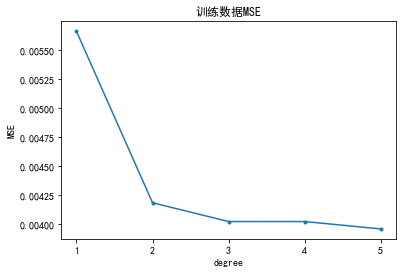

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(degrees,mse,marker='.') 
plt.xlabel("degree")
plt.ylabel("MSE")
plt.title("训练数据MSE")
ax=plt.gca()
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
plt.show() 

训练数据的MSE会随多项式回归阶数的增加而不断降低，但是可以看出，多项式阶数为3时，再增加阶数，MSE的下降不再明显。

**4. 岭回归**

这部分将$x, x^2, x^3, x^4, x^5$视为5个输入变量，通过岭回归进行多项式阶数选择。

In [7]:
poly = PolynomialFeatures(degree=5, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
clf = RidgeCV(alphas=[0.1, 1.0, 10.0])
clf.fit(x_train_poly,y_train)
print(clf.coef_[0])

[-1.75616409e-02 -4.60412070e-02  1.17183683e-02 -1.07409512e-03
  3.40562835e-05]


**5. 结论与讨论**

岭回归4阶和5阶系数接近于0，结合对训练数据MSE的观察，认为选择3阶作为多项式回归的阶数最合适。